In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the text
lines = [
    'Four score and 7 years ago our fathers brought forth,',
    '... a new NATION, conceived in liberty $$$,',
    'and dedicated to the PrOpOsItIoN that all men are created equal',
    'One nation\'s freedom equals #freedom for another $nation!'
]

# Creat the CountVectorizer instance, the stop_words parameter is set to "english" to remove common English stop words like "and", "the", and "a"
vectorizer = CountVectorizer(stop_words='english')

# Convert the text to vectorizer
word_matrix = vectorizer.fit_transform(lines)

# The get_feature_names_out method is used to get the feature names (i.e., the individual words) in the word matrix
feature_names = vectorizer.get_feature_names_out()

# The line_names list is created to store the names of each line in the original list of strings
line_names = [f'Line {(i + 1):d}' for i, _ in enumerate(word_matrix)]

# A Pandas DataFrame is created using the word_matrix.toarray() method to convert the sparse matrix to a dense array
df = pd.DataFrame(data=word_matrix.toarray(), index=line_names,columns=feature_names)

# The head() method is called on the resulting DataFrame to display the first few rows of the matrix
df.head()

,ago,brought,conceived,created,dedicated,equal,equals,fathers,forth,freedom,liberty,men,nation,new,proposition,score,years
Line 1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1
Line 2,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0
Line 3,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0
Line 4,0,0,0,0,0,0,1,0,0,2,0,0,2,0,0,0,0


In [2]:
import re
# The preprocess_text function uses the re.sub() method from Python's regular expression library (re) to remove all digits from the text and convert it to lowercase.
def preprocess_text(text):
    return re.sub(r'\d+', '', text).lower()

# The word matrix is created using the same CountVectorizer instance and the additional preprocessor parameter set to preprocess_text
vectorizer = CountVectorizer(stop_words='english', preprocessor=preprocess_text)

# Convert the text to vectorizer
word_matrix = vectorizer.fit_transform(lines)

In [3]:
import pandas as pd
import os

# Load the data use the pandas
df = pd.read_csv("Pakistani Traffic sentiment Analysis.csv")

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


{'C': 10}
The accuracy of the model is: 0.9549763033175356
The prediction result of this review is: positive


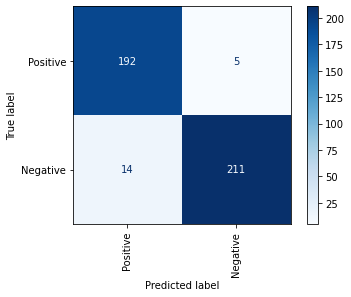

In [23]:
# (1) CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# here you can try use the grid search to find the best model parameter(a example is in SVM model)
#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
#(1)LR
model = LogisticRegression(max_iter=1000, random_state=0)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all parameter combinations.
grid_search.fit(x_train, y_train)

#`best_params` and `best_score` store the best hyperparameters and their corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search, which can be used for further analysis.
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')
#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

# Here you change the reviews
text = 'Adayala road is clear'
# Make a prediction for this review
score=model.predict_proba(vectorizer.transform([text]))[0][1]

if score >0.5:
  attitude='negative'
else:
  attitude='positive'

print('The prediction result of this review is: '+ attitude)

{'n_neighbors': 7, 'weights': 'distance'}
The accuracy of the model is: 0.9478672985781991
The prediction result of this review is: positive


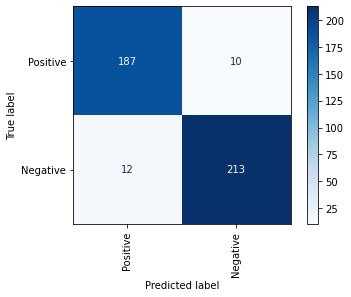

In [24]:
#(2)KNN
model=KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all parameter combinations.
grid_search.fit(x_train, y_train)

#`best_params` and `best_score` store the best hyperparameters and their corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search, which can be used for further analysis.
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')
#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

# Here you change the reviews
text = 'Adayala road is clear'

# Make a prediction for this review
score=model.predict_proba(vectorizer.transform([text]))[0][1]

if score >0.5:
  attitude='negative'
else:
  attitude='positive'

print('The prediction result of this review is: '+ attitude)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
The accuracy of the model is: 0.9739336492890995
The prediction result of this review is: positive


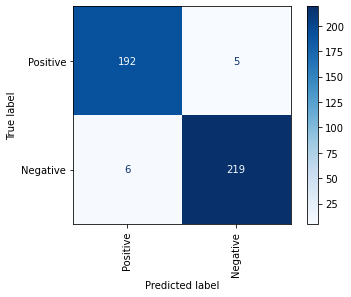

In [25]:
#(3)RF
model = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all parameter combinations.
grid_search.fit(x_train, y_train)

#`best_params` and `best_score` store the best hyperparameters and their corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search, which can be used for further analysis.
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')
#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

# Here you change the reviews
text = 'Adayala road is clear'

# Make a prediction for this review
score=model.predict_proba(vectorizer.transform([text]))[0][1]

if score >0.5:
  attitude='negative'
else:
  attitude='positive'

print('The prediction result of this review is: '+ attitude)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
The accuracy of the model is: 0.9620853080568721
The prediction result of this review is: positive


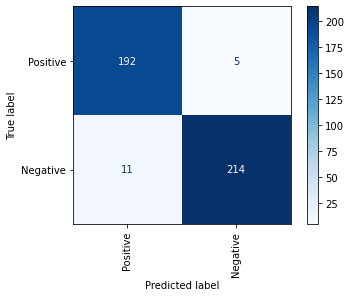

In [27]:
# (4)XGBoost
model =  XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all parameter combinations.
grid_search.fit(x_train, y_train)

#`best_params` and `best_score` store the best hyperparameters and their corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search, which can be used for further analysis.
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')
#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

# Make a prediction for this review
score=model.predict_proba(vectorizer.transform([text]))[0][1]

if score >0.5:
  attitude='negative'
else:
  attitude='positive'

print('The prediction result of this review is: '+ attitude)

{'C': 0.1, 'kernel': 'linear'}
The accuracy of the model is: 0.9620853080568721
The prediction result of this review is: positive


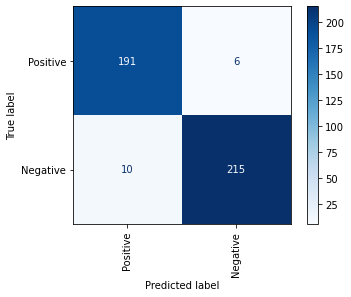

In [28]:
#(5)SVM
model= SVC(probability=True)

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10]}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all parameter combinations.
grid_search.fit(x_train, y_train)

#`best_params` and `best_score` store the best hyperparameters and their corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search, which can be used for further analysis.
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')
#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

# Make a prediction for this review
score=model.predict_proba(vectorizer.transform([text]))[0][1]

if score >0.5:
  attitude='negative'
else:
  attitude='positive'

print('The prediction result of this review is: '+ attitude)

{'alpha': 0.5, 'force_alpha': True}
The accuracy of the model is: 0.957345971563981
The prediction result of this review is: positive


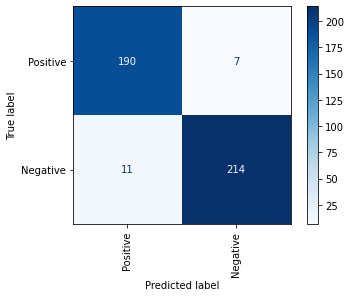

In [29]:
#(6)Naïve Bayes models
model=BernoulliNB()
param_grid = {
    'alpha': [0.1, 0.5, 1],
    'force_alpha': [True,False]}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all parameter combinations.
grid_search.fit(x_train, y_train)

#`best_params` and `best_score` store the best hyperparameters and their corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search, which can be used for further analysis.
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')
#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

# Make a prediction for this review
score=model.predict_proba(vectorizer.transform([text]))[0][1]

if score >0.5:
  attitude='negative'
else:
  attitude='positive'

print('The prediction result of this review is: '+ attitude)